In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
data = pd.read_csv("C:/Users/msami_g/OneDrive/Documents/MyPrepForIndustry/ML Projects/DiabetesDetectionML/pima-data.csv")

In [35]:
data.shape

(768, 10)

In [39]:
data.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [41]:
data.isnull().values.any()

False

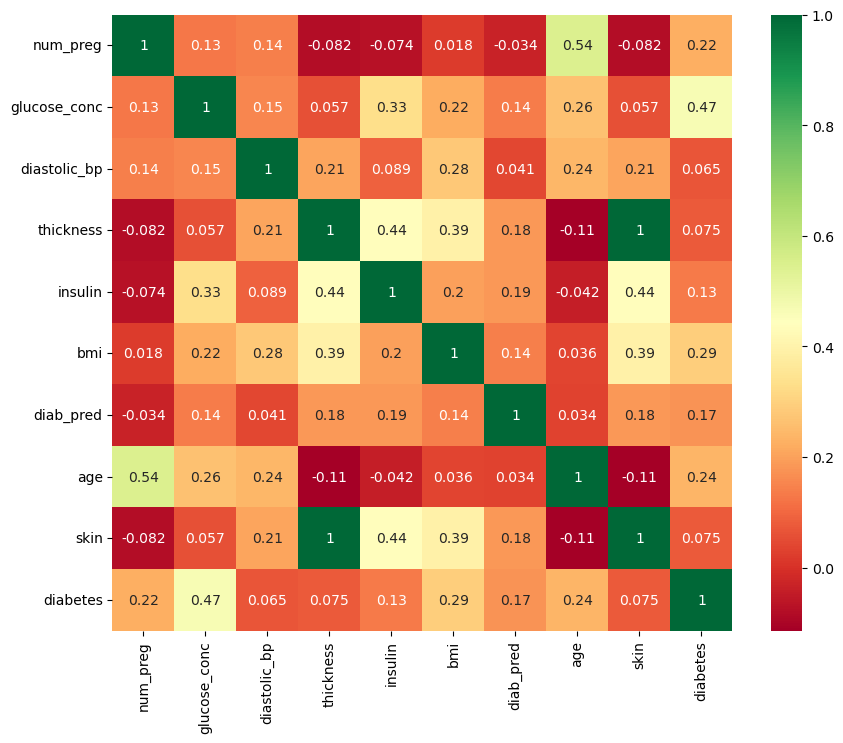

In [51]:
plt.figure(figsize=(10,8))  # Adjusted size for readability
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [53]:
data['diabetes'] = data['diabetes'].astype(int)

In [55]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [59]:
diabetes_counts = data['diabetes'].value_counts()
diabetes_counts[1], diabetes_counts[0]

(268, 500)

In [61]:
from sklearn.model_selection import train_test_split

X = data[['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']].values
y = data['diabetes'].values  # No need for a list; extract as a 1D array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [69]:
# List of features to check for missing (zero) values
features = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin', 'thickness']

# Count and print missing values for each feature
for feature in features:
   print(f"Number of rows missing {feature}: {sum(data[feature] == 0)}")

Number of rows missing num_preg: 111
Number of rows missing glucose_conc: 5
Number of rows missing diastolic_bp: 35
Number of rows missing insulin: 374
Number of rows missing bmi: 11
Number of rows missing diab_pred: 0
Number of rows missing age: 0
Number of rows missing skin: 227
Number of rows missing thickness: 227


In [93]:
# To handle missing values
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [87]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train.ravel())


RandomForestClassifier(random_state=10)

In [95]:

# Predict and calculate accuracy
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy = {metrics.accuracy_score(y_test, y_pred_rf):.3f}")

Random Forest Accuracy = 0.736


In [98]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [102]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 3.0 MB/s eta 0:00:41
   ---------------------------------------- 1.3/124.9 MB 2.7 MB/s eta 0:00:47
    --------------------------------------- 1.6/124.9 MB 2.7 MB/s eta 0:00:46
    --------------------------------------- 2.1/124.9 MB 2.5 MB/s eta 0:00:50
    --------------------------------------- 2.6/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 3.4/124.9 MB 2.6 MB/s eta 0:00:48
   - -------------------------------------- 3.9/124.9 MB 2.6 MB/s eta 0:00:47
   - -------------------------------------- 4.5/124.9 MB 2.6 MB/s eta 0:00:47
   - -------------------------------------- 5.0/124.9 MB 2.6 MB/s eta 0:00:47
   - -------------------------------------- 5.8/124.9 MB 2.6 MB/s eta 0:00:45
   -- ------------------------------------- 6.3/124.9 MB 2.7 MB/s eta 0:00:45


In [105]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [107]:
classifier=xgboost.XGBClassifier()

In [109]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [121]:
# Timer function for performance tracking
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        return datetime.now()
    else:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print(f'\nTime taken: {thour} hours {tmin} minutes and {round(tsec, 2)} seconds.')
        return None

# Start timer
start_time = timer(None)


In [123]:
# Fit the model and track time
random_search.fit(X, y.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Time taken: 0.0 hours 0.0 minutes and 26.98 seconds.


In [131]:
# Best estimator from RandomizedSearchCV
best_xgb_model = random_search.best_estimator_
print(best_xgb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [129]:
# Cross-validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(best_xgb_model, X, y.ravel(), cv=10)
print(f"XGBoost Cross-validation score: {score.mean():.3f}")

XGBoost Cross-validation score: 0.762
